# Support Vector Machine

Uma máquina de vetores de suporte (SVM, do inglês: support-vector machine) é um conjunto de métodos de aprendizado supervisionado que analisam os dados e reconhecem padrões, usado para classificação e análise de regressão.

- Efetivo para conjunto de dados com muitos atributos;
- Utiliza um conjunto menor de pontos de treinamento na função de decisão (chamados de vetores de suporte);
- Para este estudo de regressão, utilizaremos o método Support Vector Regression (SVR). Porém, na biblioteca Sklearn, há outras implementações como o NuSVR e LinearSVR.

In [18]:
# Importação de bibliotecas e métodos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVR

In [19]:
# Criando um conjunto de dados fictício para executar os exemplos
np.random.seed(10)

dataset = pd.DataFrame({
    'x': np.arange(21),
    'y': np.arange(21) + np.random.randint(0, 4, 21)
})

dataset

,x,y
0,0,1
1,1,2
2,2,2
3,3,6
4,4,4
5,5,6
6,6,9
7,7,7
8,8,9
9,9,10


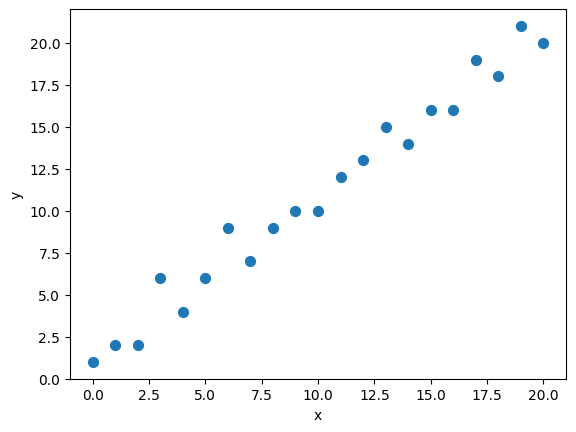

In [20]:
# Visualizando um gráfico de dispersão com os atributos (x) e rótulos (y)
dataset.plot(kind='scatter',
             x='x',
             y='y',
             s=50);

In [21]:
# Criando um modelo de regressão utilizando o método SVR
modelo_SVR  = SVR(kernel='linear') # kernel tipo linear (reta)
modelo_SVR

SVR(kernel='linear')

In [22]:
# Separando os dados em atributos e rótulos
atributos = dataset.x.to_frame()
rotulo = dataset.y.to_frame()

In [23]:
# Treinamento do modelo
modelo_SVR.fit(atributos, rotulo)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(kernel='linear')

In [24]:
# Verificando o coeficiente da reta e o seu intercepto no eixo y
modelo_SVR.coef_, modelo_SVR.intercept_

(array([[1.]]), array([0.9]))

In [25]:
# Verificando a quantidade de vetores de suporte selecionados pelo modelo
modelo_SVR.n_support_

array([17], dtype=int32)

In [26]:
# Consulta dos índices dos vetores de suporte
indices_vetor = modelo_SVR.support_
indices_vetor

array([ 0,  2,  3,  4,  6,  7, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
      dtype=int32)

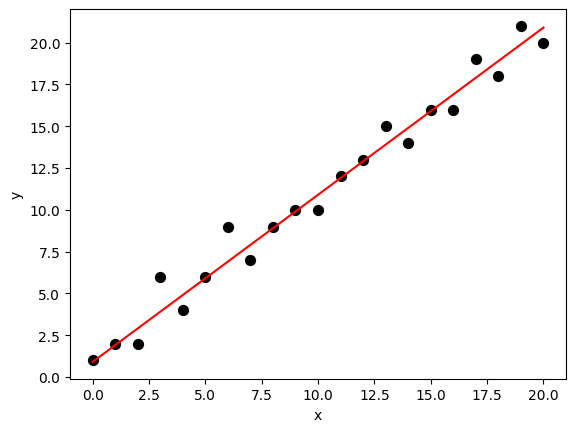

In [27]:
# Comparando os valores dos atributos e rótulos com a reta de predição do modelo

# Gráfico de dispersão com os valores de atributos e rótulos
dataset.plot(kind='scatter', # gráfico de dispersão
             x='x', # eixo x
             y='y', # eixo y
             s=50, # tamanho da marca (bola)
             c='black' # cor da marca
             )

# Gráfico de linha com a reta de regressão criada pelo modelo SVR
plt.plot(atributos, # dados dos atributos (eixo x)
         modelo_SVR.predict(atributos), # dados das predições do modelo (eixo y)
         c='red' # cor da reta
         );

In [28]:
# Adicionando um novo campo com os valores das predições do modelo na tabela dataset
dataset['predicoes'] = modelo_SVR.predict(atributos)

In [29]:
# Adicionando o campo 'support' e passando o valor 0 para depois sinalizar os dados que foram usados como vetor de suporte
dataset['support'] = 0

In [30]:
dataset

,x,y,predicoes,support
0,0,1,0.9,0
1,1,2,1.9,0
2,2,2,2.9,0
3,3,6,3.9,0
4,4,4,4.9,0
5,5,6,5.9,0
6,6,9,6.9,0
7,7,7,7.9,0
8,8,9,8.9,0
9,9,10,9.9,0


In [31]:
# Filtrando apenas os dados que foram utilizados como vetores de suporte e atribuindo o valor 1 na coluna support (índice 3)
dataset.iloc[indices_vetor, 3] = 1

In [32]:
dataset

,x,y,predicoes,support
0,0,1,0.9,1
1,1,2,1.9,0
2,2,2,2.9,1
3,3,6,3.9,1
4,4,4,4.9,1
5,5,6,5.9,0
6,6,9,6.9,1
7,7,7,7.9,1
8,8,9,8.9,0
9,9,10,9.9,0


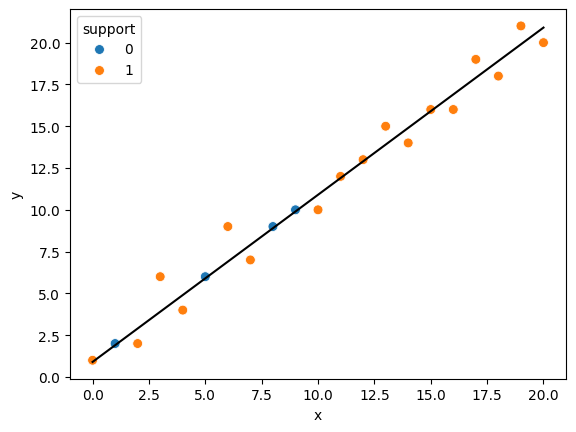

In [33]:
# Construindo um gráfico de dispersão com três dimensões
sns.scatterplot(
    data=dataset, #base de dados
    x='x', # eixo x com atributos
    y='y', # eixo y com os rótulos
    hue='support', # segmentação de cores em vetores de suporte(1) e não vetores de suporte(0)
    s=50 # tamanho dos pontos no gráfico
)

# Gráfico de linha (reta) criada pelo modelo SVR
plt.plot(dataset['x'], # eixo x com atributos
        dataset['predicoes'], # eixo y com as predições
        color='black' # cor da linha
);

No gráfico acima, podemos ver os pontos com seus atributos (eixo x) e rótulos (eixo y); os pontos que foram usados como vetores de suporte (bolas em laranja) e a reta de regressão linear que o modelo criou.